In [88]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import squarify as sq
import plotly.io as pio
pio.templates
import seaborn as sns

In [89]:
df = pd.read_csv('dataset/funding.csv')
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09-Jan-20,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13-Jan-20,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09-Jan-20,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02-Jan-20,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02-Jan-20,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29-Jan-15,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29-Jan-15,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30-Jan-15,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30-Jan-15,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [90]:
funding = df[['Date dd/mm/yyyy',	'Startup Name',	'Industry Vertical', 'SubVertical', 'Investors Name',	'InvestmentnType', 'Amount in USD',	'Remarks']].copy()

In [91]:
funding['Date dd/mm/yyyy'] = pd.to_datetime(funding['Date dd/mm/yyyy'])
funding['Year'] = funding['Date dd/mm/yyyy'].dt.year
funding['Month'] = funding['Date dd/mm/yyyy'].dt.month
funding['Day'] = funding['Date dd/mm/yyyy'].dt.day
funding['Date dd/mm/yyyy'].replace(np.nan, '01/01/2020', inplace=True)

In [92]:
df['Date dd/mm/yyyy']

0       09-Jan-20
1       13-Jan-20
2       09-Jan-20
3       02-Jan-20
4       02-Jan-20
          ...    
3039    29-Jan-15
3040    29-Jan-15
3041    30-Jan-15
3042    30-Jan-15
3043    31-Jan-15
Name: Date dd/mm/yyyy, Length: 3044, dtype: object

In [93]:
# Delete remarks column
df.drop('Remarks', axis=1, inplace=True)


In [94]:
# Startup Cleaning and Preprocessing repeated Company Names
df['Startup Name'].replace('Ola Cabs', 'Ola', inplace=True)
df['Startup Name'].replace('Flipkart.com', 'Flipkart', inplace=True)
df['Startup Name'].replace('Oyo Rooms', 'Oyo', inplace=True)
df['Startup Name'].replace('.com', '', inplace=True)
df['Startup Name'].replace('Paytm Marketplace', 'Paytm', inplace=True)
df['Startup Name'].replace('.in', '', inplace=True)


In [95]:
def clean_Industry_Vertical(name):
    if name =='ecommerce':
        return 'E-commerce'
    elif name =='eCommerce':
        return 'E-commerce'
    elif name =='eCommece':
        return 'E-commerce'
    elif name =='ECommerce':
        return 'E-commerce'
    elif name =='E-Commerce':
        return 'E-commerce'
    elif name =='E-Commerce & M-Commerce platform':
        return 'M-commerce platform'
    elif name =='Last Mile Transportation':
        return 'Transportation'
    elif name =='Transportation & Logistics Platform':
        return 'Transportation'
    elif name =='Fintech':
        return 'FinTech'
    elif name =='Logistics Tech':
        return 'Logistics'
    elif name == 'Health and wellness':
        return 'Health and Wellness'
    elif name == 'Food and Beverage':
        return 'Food and Beverages'
    elif name == 'Saas':
        return 'SaaS'
    elif name == 'SaaS, Ecommerce':
        return 'SaaS'
    elif name == 'healthcare':
        return 'Healthcare'
    elif name == 'Edtech':
        return 'EdTech'
    elif name == 'Ecommerce':
        return 'E-commerce'
    elif name == 'Food-Tech':
        return 'Food Tech'
    elif name == 'Healthcare\\\\nService provider':
        return 'Healthcare Service provider'
    elif name == 'Hyperlocal\\\\xc2\\\\xa0 Grocery Delivery Service':
        return 'Hyperlocal Grocery Delivery Service'
    elif name == 'Mobile Growth Hacking\\\\nPlatform':
        return 'Mobile Growth Hacking Platform'
    elif name == 'Location based Nightlife recommendation\\\\xc2\\\\xa0 Platform':
        return 'Location based Nightlife recommendation Platform'
    elif name == 'Luxury goods\\\\xc2\\\\xa0 Shopping Platform':
        return 'Luxury goods Shopping Platform'
    elif name == 'Chain of Tea Caf\\\\xc3\\\\xa9\\\\xe2\\\\x80\\\\x99s':
        return 'Chain of Tea Cafe'
    elif name == 'Online home d\\\\xc3\\\\xa9cor marketplace':
        return 'Online home decor marketplace'
    elif name =='Online Home D\\\\xc3\\\\xa9cor':
        return 'Online hom'
    elif name =='Online home decor marketplace':
        return 'decor marketplace' 
    elif name =='Online Furnishing\\\\neCommerce':
        return ''
    elif name =='Interactive\\\\xc2\\\\xa0 How-To Guides':
        return 'Interactive'
    elif name =='OnDemand\\\\nMobile Handyman Services':
        return 'Handyman Services'
    


    return name

In [96]:
df['Industry Vertical'] = df['Industry Vertical'].apply(clean_Industry_Vertical)

In [97]:
import re
def clean_Amount_column(Amount):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    if isinstance(Amount, str):
            if Amount == 'undisclosed' or Amount == 'Undisclosed':
                return np.nan
            if Amount == 'unknown':
                return np.nan
            Amount = emoji_pattern.sub(r'', Amount)
            Amount = Amount.replace(',', '')
            Amount = Amount.replace('+', '')
            Amount = Amount.replace('\\\\xc2\\\\xa', '').replace('0N/A','')
            Amount = Amount.replace('.', '')
            Amount = Amount.replace('\\\\xc2\\\\xa0', '')
            Amount = Amount.replace('\\\\xc2\\\\xa6', '')
            Amount = Amount.replace('\\\\xc2\\\\xa7', '')
            Amount = Amount.replace('\\\\xc2\\\\xa8', '')
            Amount = Amount.replace('\\\\xc2\\\\xa9', '')
            Amount = Amount.replace('\\\\xc2\\\\xaa', '')
            Amount = Amount.replace('\\\\xc2\\\\xab', '')
            Amount = Amount.replace('\\\\xc2\\\\xac', '')
            Amount = Amount.replace('\\\\xc2\\\\xad', '')
            Amount = Amount.replace('\\\\xc2\\\\xae', '')
            Amount = Amount.replace('\\\\xc2\\\\xaf', '')
            Amount = Amount.replace('\\\\xc2\\\\xb', '')
            Amount = Amount.replace('\\\\xc2\\\\xb0', '')
            Amount = Amount.replace('\\\\xc2\\\\xb1', '')
            Amount = Amount.replace('\\\\xc2\\\\xb2', '')
            Amount = Amount.replace('\\\\xc2\\\\xb3', '')
            Amount = Amount.replace('\\\\xc2\\\\xb4', '')
            Amount = Amount.replace('\\\\xc2\\\\xb5', '')
            Amount = Amount.replace('\\\\xc2\\\\xb6', '')
            Amount = Amount.replace('\\\\xc2\\\\xb7', '')
            Amount = Amount.replace('\\\\xc2\\\\xb8', '')
            Amount = Amount.replace('\\\\xc2\\\\xb9', '')
            Amount = Amount.replace('\\\\xc2\\\\xba', '')
            Amount = Amount.replace('\\\\xc2\\\\xbb', '')
            Amount = Amount.replace('\\\\xc2\\\\xbc', '')
            Amount = Amount.replace('\\\\xc2\\\\xbd', '')
            Amount = Amount.replace('\\\\xc2\\\\xbe', '')
            Amount = Amount.replace('\\\\xc2\\\\xbf', '')
            Amount = Amount.replace('\\\\xc2\\\\xc',  '')
            Amount = Amount.replace('\\\\xc2\\\\xc0', '')
            Amount = Amount.replace('\\\\xc2\\\\xc1', '')
            Amount = Amount.replace('\\\\xc2\\\\xc2', '')
            Amount = Amount.replace('\\\\xc2\\\\xc3', '')
            Amount = Amount.replace('\\\\xc2\\\\xc4', '')
            

            if Amount:
                Amount = float(Amount)
                return float(Amount)            
            # print(Amount, type(Amount))
    return np.nan

In [98]:
df['Amount in USD'] = df['Amount in USD'].apply(clean_Amount_column)

In [99]:
# polar
df['Industry Vertical'].value_counts()

Consumer Internet                       941
Technology                              478
E-commerce                              300
Healthcare                               71
Finance                                  62
                                       ... 
Ride Sharing platform                     1
Online P2P lending marketplace            1
B2B marketplace for industrial goods      1
Cloud Based Collaboration platform        1
Online Travel Marketplace                 1
Name: Industry Vertical, Length: 804, dtype: int64

In [100]:
# nan values in Industry Vertical
df['Industry Vertical'].isna().sum()

171

In [101]:
# only take the top 50 industry vertical
top_industry_vertical = df['Industry Vertical'].value_counts().index[:15]
top_industry_vertical

Index(['Consumer Internet', 'Technology', 'E-commerce', 'Healthcare',
       'Finance', 'Logistics', 'Education', 'Food & Beverage', 'Ed-Tech',
       'FinTech', 'Food and Beverages', 'IT', 'Transportation', 'Real Estate',
       'Health and Wellness'],
      dtype='object')

In [102]:
# records of top 50 industry vertical
df_top_industry_vertical = df[df['Industry Vertical'].isin(top_industry_vertical)].copy()
df_top_industry_vertical


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
1,2,13-Jan-20,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,09-Jan-20,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,02-Jan-20,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
5,6,13-Jan-20,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,9000000.0
7,8,12-Dec-19,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,6000000.0
...,...,...,...,...,...,...,...,...,...
2817,2818,07-Apr-15,LogiNext,Logistics,NaN,Mumbai,"Ajit Surana, Sanjay Mehta",Seed Funding,NaN
2818,2819,08-Apr-15,FirstCry.com,E-commerce,NaN,Pune,"Silicon Valley Ventures, NEA Ventures, Valiant...",Private Equity,10000000.0
2825,2826,09-Apr-15,Purple Squirrel,Ed-Tech,NaN,Mumbai,"Matrix Partners India, India Quotient",Private Equity,NaN
2830,2831,13-Apr-15,Nayi Disha,Ed-Tech,NaN,New Delhi,"Ajay Relan,",Seed Funding,300000.0


In [103]:
IV=df['Industry Vertical']
label15=np.arange(0,15)
top=df["Industry Vertical"].value_counts().head(15)
top

Consumer Internet      941
Technology             478
E-commerce             300
Healthcare              71
Finance                 62
Logistics               37
Education               24
Food & Beverage         23
Ed-Tech                 14
FinTech                 10
Food and Beverages       9
IT                       8
Transportation           7
Real Estate              6
Health and Wellness      6
Name: Industry Vertical, dtype: int64

In [104]:
df['Amount in USD'].dtype

dtype('float64')

In [105]:
# bar chart dark theme
for template in ["plotly_dark", "plotly", "plotly_white", "ggplot2", "seaborn", "simple_white", "none"]:
    fig = px.bar(x=top.index, y=top, title="Top 15 Industry Vertical", log_y=True, labels={"x": "Industry Vertical", "y": "Count"}, color=top.index,
             width=1000, height=600, template='gridon',
             color_discrete_sequence=px.colors.qualitative.Dark24)

fig.add_trace(
    go.Scatter(
        x=top.index,
        y=top,
        mode="lines+markers",
        line=dict(color="red", width=5),
        name="lines+markers",
    )
)

In [106]:
fig = px.bar_polar(df_top_industry_vertical, r="Amount in USD", theta="Industry Vertical", color="Industry Vertical", template='none',
                     color_discrete_sequence=px.colors.qualitative.Dark24, title="Top 15 Industry Vertical with Amount in USD",
                     width=1000, height=600, labels={"x": "Industry Vertical", "y": "Amount in USD"}, log_r=True,
                     color_discrete_map={"Consumer Internet": "red", "Technology": "blue", "eCommerce": "green", "Healthcare": "yellow", "Finance": "orange", "Logistics": "purple", "Education": 
                     "pink", "Food & Beverage": "brown", "Travel": "black", "Transportation": "grey", 
                     "Others": "cyan", "Real Estate": "magenta", "Media & Entertainment": "lime", "Gaming": "teal", "Automobiles": "olive"})
fig.show()

In [107]:
# pie chart size of each sector
fig = px.pie(df_top_industry_vertical, values='Amount in USD', names='Industry Vertical', title='Top 15 Industry Vertical',
            color='Industry Vertical',
            labels={'Industry Vertical':'Industry Vertical'},
            width=1000, height=600, template='none',
            color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', hole=0.4, marker=dict(line=dict(color='#000000', width=2)),
                   opacity=0.8, rotation=45, textfont_size=15, texttemplate='%{label}<br>%{value:$,.2f}'
                        and '%{percent}')
fig.show()

In [108]:
# scatter plot

for template in ["plotly_dark", "plotly", "plotly_white", "ggplot2", "seaborn", "simple_white", "none"]:
    fig = px.scatter(df_top_industry_vertical, x="Amount in USD", y="Industry Vertical", color="Industry Vertical", hover_name="Startup Name", log_x=True, size_max=60,
                title="Top 15 Industry Vertical", labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"},
                width=1100, height=600, template= 'gridon',
                color_discrete_sequence=px.colors.qualitative.Dark24)
fig.show()

In [109]:
df_top_industry_vertical.sort_values(by='Amount in USD', ascending=False, inplace=True)
fig = px.histogram(df_top_industry_vertical,
                    x="Amount in USD", y="Industry Vertical", color="Industry Vertical", hover_name="Startup Name", log_x=True,width=1000, height=600,
                title="Top 15 Industry Vertical", labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"}, template='ygridoff',
                color_discrete_sequence=px.colors.qualitative.Dark24, nbins=100, )
fig.show()

In [110]:
# box plot
fig = px.box(df_top_industry_vertical, y="Amount in USD", x="Industry Vertical", color= "Industry Vertical", hover_name="Startup Name", log_y=True, points=False,
             width=1000, height=600, title="Top 15 Industry Vertical", labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"},
             color_discrete_sequence=px.colors.qualitative.Dark24, template='plotly_white')
fig.show()

In [111]:
# violin plot
fig = px.violin(df_top_industry_vertical, x="Amount in USD", y="Industry Vertical", color="Industry Vertical", hover_name="Startup Name", log_x=True, box=True,
             width=1100, height=600, title="Top 15 Industry Vertical", labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"}
             ,color_discrete_sequence=px.colors.qualitative.Dark24, template='plotly_white')
fig.show()

In [112]:
# 3d scatter plot
fig = px.scatter_3d(df_top_industry_vertical, x="Amount in USD", y="Industry Vertical", z="Startup Name", color="Industry Vertical", hover_name="Startup Name", log_x=True, size_max=60,
                title="Top 15 Industry Vertical", labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"},
                width=1000, height=600, color_discrete_sequence=px.colors.qualitative.Dark24, template='plotly_white')
fig.show()

In [113]:
fig = px.scatter_polar(df[:70], r="Amount in USD", theta="Industry Vertical", color="Industry Vertical", hover_name="Startup Name", log_r=True, size_max=60,
                title="Top 15 Industry Vertical", labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"},  width=1000, height=600, symbol="Industry Vertical",
                color_discrete_sequence=px.colors.qualitative.Dark24, template='none')
fig.show()

In [114]:
def _check_dataframe_all_leaves(df):
    df_sorted = df.sort_values(by=list(df.columns))
    null_mask = df_sorted.isnull()
    df_sorted = df_sorted.astype(str)
    df_sorted[null_mask] = np.nan
    return df_sorted

In [115]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [116]:
temp_df = df.dropna(subset=['Industry Vertical', 'City  Location'])
px.treemap(temp_df, path=['Industry Vertical', 'City  Location'], values='Amount in USD',
           width=1000, height=600, title="Top 15 Industry Vertical", labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"})


In [117]:
temp_df = df.dropna(subset=['Industry Vertical', 'Startup Name'])
fig = px.sunburst(temp_df[:50], path=['Industry Vertical', 'Startup Name'], values='Amount in USD', template='none', color='Amount in USD',
                  width=1000, height=600, title="Industry Vertical & Startup Name ", labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"}
                   ,color_discrete_sequence=px.colors.qualitative.Dark24, maxdepth=2)
fig.show()

In [118]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [119]:
# line chart 
fig = px.line(df[:1700], x="Industry Vertical", y="Amount in USD",  color="Industry Vertical",
              line_group="Industry Vertical", hover_name="Startup Name", log_y=True, width=1000, height=600, template='plotly',
              labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"}, color_discrete_sequence=px.colors.qualitative.Dark24,
              )
fig.show()

In [120]:
fig = px.ecdf(df[:1500], x="Industry Vertical", y="Amount in USD", color="Industry Vertical", width=1100, height=600, title="Top 15 Industry Vertical",
              labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"}, color_discrete_sequence=px.colors.qualitative.Dark24,
              template='ggplot2')
fig.show()

In [121]:
fig = px.histogram(df_top_industry_vertical, x="Industry Vertical", y="Amount in USD", color="Industry Vertical")
fig.show()

In [122]:
fig = px.box(df_top_industry_vertical, x="Industry Vertical", y="Amount in USD", color="Industry Vertical", 
            )
fig.show()

In [123]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [124]:
fig = px.funnel(df[:30], x="City  Location", y="InvestmentnType", color="Industry Vertical",
                template='seaborn', width=1100, height=700, title="Top 15 Industry Vertical", labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"}, 
                color_discrete_sequence=px.colors.qualitative.Dark24, )
fig.show()

In [125]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [126]:
top_InvestmentnType = df['InvestmentnType'].value_counts().index[:5]
top_InvestmentnType

Index(['Private Equity', 'Seed Funding', 'Seed/ Angel Funding',
       'Seed / Angel Funding', 'Seed\\nFunding'],
      dtype='object')

C:\Users\Dell\AppData\Local\Temp\ipykernel_24984\2457895153.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



[ 145000. 1334600.       0.  319605.       0.]


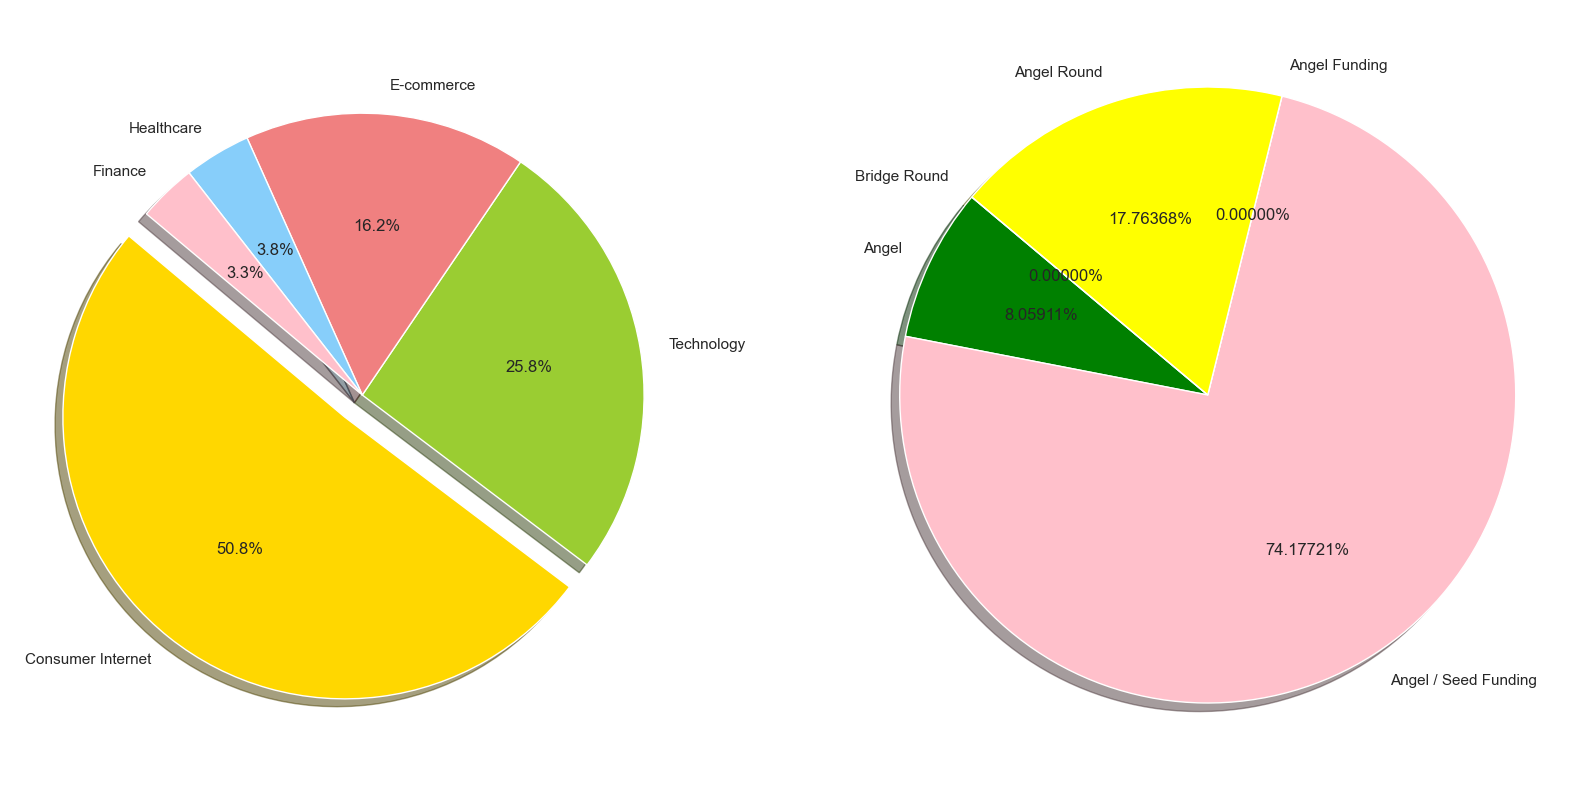

In [127]:
d=df['Industry Vertical'].value_counts().head(5)
f=df['InvestmentnType'].value_counts().head(5)
g=df.groupby('InvestmentnType').sum()['Amount in USD']
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
labels=[d.index,g.index[:5]]
size=[d.values,g.values[:5]]
colors = [['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink'],['green','pink','red','yellow']]
plt.axis('equal')
explode = ((0.1, 0, 0, 0,0),(-0.5,0.5,0.1,0.1))
print(size[1])
ax[0].pie(size[0],explode=explode[0], labels=labels[0], colors=colors[0],
        autopct='%1.1f%%', shadow=True, startangle=140)

ax[1].pie(size[1], labels=labels[1], colors=colors[1],autopct='%1.5f%%', shadow=True, startangle=140)
plt.show()

In [128]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

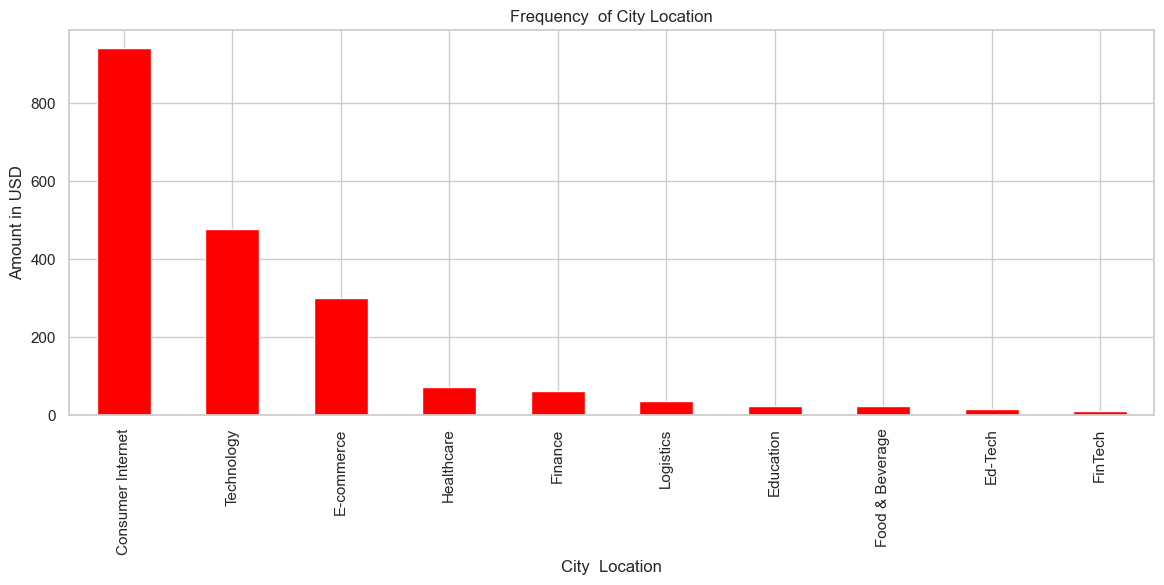

In [129]:
plt.figure(figsize=(15,15))
iv=df['Industry Vertical'].value_counts().head(10)
iv.plot.bar(df, color='red',figsize=(14,5))

plt.title('Frequency  of City Location')
plt.ylabel('Amount in USD')
plt.xlabel('City  Location')
plt.show()

In [130]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [131]:
import resample as rs

Most preferrable cities as per Investment on startups

In [132]:
def clean_city_names(name):
    if name == '\\\\xc2\\\\xa0Noida':
        return 'Noida'
    elif name == '\\\\xc2\\\\xa0Bangalore':
        return 'Bangalore'
    elif name == '\\\\xc2\\\\xa0Gurgaon':
        return 'Gurugram'
    elif name == '\\\\xc2\\\\xa0New Delhi':
        return 'New Delhi'
    elif name == '\\\\xc2\\\\xa0Mumbai':
        return 'Mumbai'
    elif name == '\\\\xc2\\\\xa0Pune':
        return 'Pune'
    elif name == '\\\\xc2\\\\xa0Hyderabad':
        return 'Hyderabad'
    elif name == '\\\\xc2\\\\xa0Chennai':
        return 'Chennai'
    elif name == '\\\\xc2\\\\xa0Ahmedabad':
        return 'Ahmedabad'
    elif name == '\\\\xc2\\\\xa0Jaipur':
        return 'Jaipur'
    elif name == '\\\\xc2\\\\xa0Kolkata':
        return 'Kolkata'
    elif name == '\\\\xc2\\\\xa0Chandigarh':
        return 'Chandigarh'
    elif name == '\\\\xc2\\\\xa0Vadodara':
        return 'Vadodara'
    elif name == '\\\\xc2\\\\xa0Bhubaneshwar':
        return 'Bhubaneshwar'
    elif name == '\\\\xc2\\\\xa0Indore':
        return 'Indore'
    elif name == 'Mumbai/Bengaluru':
        return 'Mumbai'
    elif name == 'India/US':
        return 'Jaipur'
    elif name == 'India/Singapore':
        return 'Patna'
    elif name == 'Bangalore/ Bangkok':
        return 'Bangalore'
    elif name == 'SFO / Bangalore':
        return 'Chandigarh'
    elif name == 'Seattle / Bangalore':
        return 'Prayagraj'
    elif name == 'Pune/Seattle':
        return 'Pune'
    elif name == 'Pune / Dubai':
        return 'Visakhapatnam'
    elif name == 'Bangalore / SFO':
        return 'Agra'
    elif name == 'New Delhi / US':
        return 'Bhopal'
    elif name == 'Mumbai / UK':
        return 'Nashik'
    elif name == 'Hyderabad/USA':
        return 'Hyderabad'
    elif name == 'Bangalore / Palo Alto':
        return 'Madurai'
    elif name == 'Mumbai / NY':
        return 'Varanasi'  
    elif name == 'USA/India':
        return 'Kochi'
    elif name == 'Goa/Hyderabad':
        return 'Goa'
    elif name == 'Noida / Singapore':
        return 'Kanpur'
    elif name == 'Pune / US':
        return 'Nagpur'
    elif name == 'Chennai/ Singapore':
        return 'Gurugram'
    elif name == 'Pune / Singapore':
        return 'Ghaziabad'
    elif name == 'Bangalore / San Mateo': 
        return 'Faridabad'
    elif name == 'New York/ India':
        return 'Meerut'
    elif name == 'US/India':
        return 'Ranchi'
    elif name == 'Gurgaon / SFO':
        return 'Kerala'
    elif name == 'Bangalore / USA':
        return 'Lucknow'
    elif name == 'New Delhi/ Houston':
        return 'Rajkot'
    elif name == 'Mumbai / Global':
        return 'srinagar'
    elif name == 'India / US':
        return 'Gwalior'
    elif name == 'New Delhi / California':
        return 'Madurai'
    elif name == 'Dallas / Hyderabad':
        return 'Solapur'
    

    
    # more
    return name

In [133]:
df['City  Location'] = df['City  Location'].apply(clean_city_names)

In [134]:
df['City  Location' ].unique()

array(['Bengaluru', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Tulangan', 'Hyderabad', 'Burnsville',
       'Menlo Park', 'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore',
       'Taramani', 'Andheri', 'Chembur', 'Nairobi', 'Haryana', 'New York',
       'Karnataka', 'Bhopal', 'Bengaluru and Gurugram', 'Patna', 'Jaipur',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'California', 'India',
       'Ahemadabad', 'Rourkela', 'Srinagar', 'Bhubneswar', 'Chandigarh',
       'Delhi & Cambridge', 'Kolkatta', 'Kolkata', 'Coimbatore',
       'Bangalore', 'Udaipur', nan, 'Ahemdabad', 'Bhubaneswar',
       'Ahmedabad', 'Surat', 'Goa', 'Uttar Pradesh', 'Nw Delhi', 'Gaya',
       'Vadodara', 'Trivandrum', 'Missourie', 'Panaji', 'Gwalior',
       'Karur', 'Udupi', 'Kochi', 'Agra', 'Hubli', 'Kerala', 'Kozhikode',
       'US', 'Siliguri', 'USA', 'Lucknow', 'Kanpur', 'London',
       'Pr

In [135]:
fig = px.bar(df[:25], x="City  Location", y="Amount in USD", color="City  Location", title="City  Location wise Investment",
           width=1000, height=600, labels={"Amount in USD": "Amount in USD", "City  Location": "City  Location"}, template='seaborn',
           color_discrete_sequence=px.colors.qualitative.Dark24,)    
fig.show()

In [136]:
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09-Jan-20,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2,13-Jan-20,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,09-Jan-20,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,02-Jan-20,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,02-Jan-20,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0
...,...,...,...,...,...,...,...,...,...
3039,3040,29-Jan-15,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000.0
3040,3041,29-Jan-15,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000.0
3041,3042,30-Jan-15,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0
3042,3043,30-Jan-15,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN


In [137]:
top_city_location = df['City  Location'].value_counts().index[:15]
top_city_location

Index(['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Bengaluru', 'Pune',
       'Hyderabad', 'Chennai', 'Noida', 'Gurugram', 'Ahmedabad', 'Delhi',
       'Jaipur', 'Kolkata', 'Indore'],
      dtype='object')

c:\Users\Dell\miniconda3\minii\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning:

Mean of empty slice

c:\Users\Dell\miniconda3\minii\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning:

Mean of empty slice

c:\Users\Dell\miniconda3\minii\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning:

Mean of empty slice



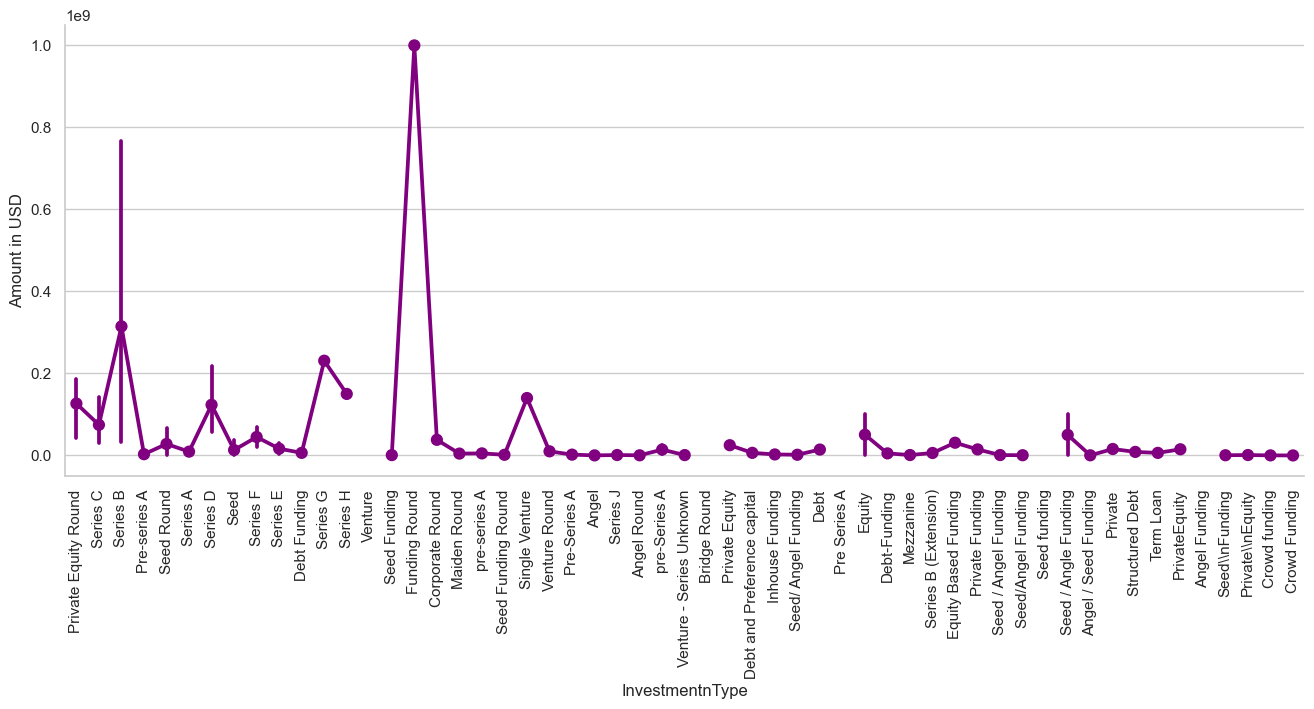

In [138]:
sns.catplot(data=df, x="InvestmentnType", y="Amount in USD", kind="point",height=5.5,aspect=2.5, color='purple')
# rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

In [139]:
df['Industry Vertical'].unique()

array(['E-Tech', 'Transportation', 'E-commerce', 'FinTech',
       'Fashion and Apparel', 'Logistics', 'Hospitality', 'Technology',
       'Aerospace', 'B2B-focused foodtech startup', 'Finance', 'Video',
       'Gaming', 'Software', 'Health and Wellness', 'Education',
       'Food and Beverages', 'B2B Marketing', 'Video Games', 'SaaS',
       'Healthcare', 'Customer Service', 'B2B', 'Consumer Goods',
       'Advertising, Marketing', 'IoT', 'Information Technology',
       'Consumer Technology', 'Accounting', 'Retail',
       'Customer Service Platform', 'Automotive', 'EdTech', 'Services',
       'Compliance', 'Transport', 'Artificial Intelligence', 'Tech',
       'Health Care', 'Luxury Label', 'Waste Management Service',
       'Deep-Tech', 'Agriculture', 'Energy', 'Digital Media',
       'Automobile', 'Agtech', 'Social Media', 'AI', 'Nanotechnology',
       'Services Platform', 'Travel Tech', 'Online Education',
       'Online Marketplace', 'NBFC', 'Food', 'Food Tech', 'Automation',
 

In [140]:
sns.set(style="whitegrid")
fig = px.violin(df[:50], y="Amount in USD", x="Startup Name", color="Industry Vertical", box=True, points="all", template='seaborn',
                hover_data=df.columns, width=1000, height=600,  labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"},)
fig.show()

In [141]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [142]:
fig = px.pie(df[:50], values='Amount in USD', names='City  Location', title='City Location Distribution', width=800, height=600)
fig.show()

In [143]:
fig = px.parallel_categories(df[:25], dimensions=['City  Location', 'Industry Vertical', 'Amount in USD'], color="Amount in USD", color_continuous_scale=px.colors.sequential.Inferno,
                             labels={'City  Location':'City Location', 'Industry Vertical':'Industry Vertical', 'Amount in USD':'Amount in USD'},
                             title='City Location, Industry Vertical and Amount in USD Parallel Categories Plotting', width=1000, height=600,
                             color_continuous_midpoint=np.average(df['Amount in USD'], weights=df['Amount in USD']),
                             )
fig.show()

In [144]:
fig = px.treemap(df[:50], path=['Industry Vertical', 'City  Location'], values='Amount in USD', title='Industry Vertical and City Location Treemap',
                    color_discrete_sequence = px.colors.qualitative.Dark2, width=1000, height=600)
fig.show()

In [145]:
fig = px.density_contour(df[:25], x="Amount in USD", y="Industry Vertical", color="Industry Vertical", marginal_x="rug", marginal_y="histogram",
                         hover_data=df.columns, title='Industry Vertical and Amount in USD Density Contour Plotting', width=1100, height=600)
fig.show()

In [146]:
fig = px.density_heatmap(df[:25], x="Amount in USD", y="Industry Vertical", marginal_x="rug", marginal_y="histogram",
                            hover_data=df.columns, title='Industry Vertical and Amount in USD Density Heatmap Plotting', width=1000, height=600,
                            template='seaborn')
fig.show()

In [147]:
fig = px.funnel(df[:30], x="Industry Vertical", y="Amount in USD", color="Industry Vertical",title="Top 15 Industry Vertical",  width=1100, height=600,
                labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"}, template='ggplot2',
                color_discrete_sequence=px.colors.qualitative.Dark24, )
fig.show()

In [148]:
fig = px.violin(df[:25], x="Startup Name", y="Amount in USD", color="Industry Vertical", box=True, points="all",  width=1000, height=600, hover_data=df_top_industry_vertical.columns,
                labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"}, )
fig.show()

In [149]:
fig = px.scatter_matrix(df[:25], dimensions=["Amount in USD", "Industry Vertical", "City  Location", "InvestmentnType"], color="Industry Vertical", title="Scatter Matrix of Amount in USD by Industry Vertical",
                        labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical", "City  Location": "City  Location", "InvestmentnType": "InvestmentnType"},
                        color_discrete_sequence=px.colors.qualitative.Dark24, template='plotly', height=800, width=1000, opacity=0.7,
                        hover_data=df.columns,)
fig.show()

In [150]:
fig = px.bar_polar(df[:180], r="Startup Name", theta="Amount in USD", color="Industry Vertical",
                    template="none", title='Polar Bar Chart ', height=600, width=1000,
                     labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"},
                         
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

In [151]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, 'BYJU’S'),
  Text(1, 0, 'Shuttl'),
  Text(2, 0, 'Mamaearth'),
  Text(3, 0, 'wealthbucket'),
  Text(4, 0, 'Fashor'),
  Text(5, 0, 'Pando'),
  Text(6, 0, 'Zomato'),
  Text(7, 0, 'Ecozen'),
  Text(8, 0, 'CarDekho'),
  Text(9, 0, 'Dhruva Space'),
  Text(10, 0, 'Rivigo'),
  Text(11, 0, 'Healthians'),
  Text(12, 0, 'Licious'),
  Text(13, 0, 'InCred'),
  Text(14, 0, 'Trell'),
  Text(15, 0, 'Rein Games'),
  Text(16, 0, 'Lenskart.com'),
  Text(17, 0, 'Freshworks'),
  Text(18, 0, 'Misters'),
  Text(19, 0, 'Sunstone Eduversity Pvt. Ltd'),
  Text(20, 0, 'Burger Singh'),
  Text(21, 0, 'Ninjacart'),
  Text(22, 0, 'Aye Finance'),
  Text(23, 0, 'SuperGaming'),
  Text(24, 0, 'Clumio'),
  Text(25, 0, 'eBikeGo'),
  Text(26, 0, 'Digital Mall Asia'),
  Text(27, 0, 'Medikabazaar'),
  Text(28, 0, 'Vogo Automotive')])

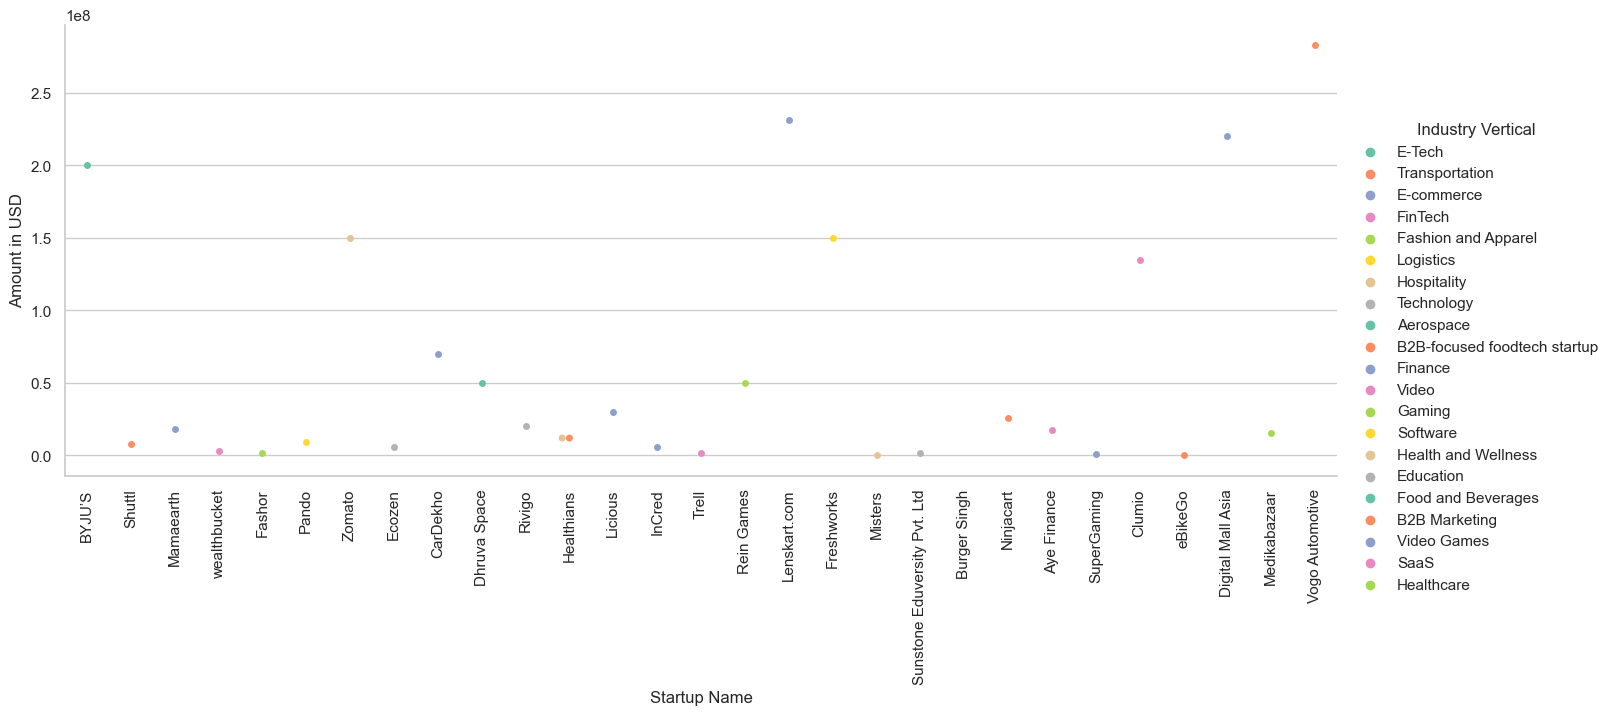

In [152]:
sns.catplot( df[:30],x="Startup Name", y="Amount in USD", kind="swarm", height=5.5, aspect=2.5, legend_out=True,
            palette="Set2",hue="Industry Vertical", 
             )
plt.xticks(rotation=90) 
             

In [153]:
fig = px.pie(df[10:25], values='Amount in USD', names='Startup Name', color='Amount in USD', title='Startup Name and Amount in USD Pie Chart', 
                width=1000, height=600, color_discrete_sequence=px.colors.sequential.Plasma_r, template='none', hole=0.4,
                labels={'Amount in USD':'Amount in USD', 'Startup Name':'Startup Name'}, hover_data=df.columns, )

fig.show()

In [154]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [155]:
fig = px.sunburst(df[:20], path= ['InvestmentnType','City  Location', 'Industry Vertical'], values='Amount in USD', title='InvestmentnType, City  Location, Industry Vertical and Sunburst Plotting',
                    color_discrete_sequence=px.colors.sequential.Plasma_r, width=1200, height=600, template='plotly_white', color_continuous_scale=px.colors.sequential.Plasma_r,
                    color_continuous_midpoint=np.average(df['Amount in USD'], weights=df['Amount in USD']), hover_data=df.columns, labels={ 'InvestmentnType':'InvestmentnType', 'City  Location':'City  Location'})
fig.show()

In [156]:
fig = px.scatter_polar(df[:130], r="City  Location", theta="Amount in USD", color="City  Location", template="plotly_white", title='City  Location and Amount in USD Scatter Polar Plotting',
                        color_discrete_sequence=px.colors.sequential.Plasma_r, width=1000, height=600, hover_data=df.columns, labels={'City  Location':'City  Location', 'Amount in USD':'Amount in USD'},
                        color_continuous_scale=px.colors.sequential.Plasma_r, color_continuous_midpoint=np.average(df['Amount in USD'], weights=df['Amount in USD']),
                        symbol="City  Location", )
fig.show()

In [157]:
fig = px.line_polar(df[:100], theta="Amount in USD", r="City  Location", color="Industry Vertical", line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r,
                    template="plotly_white", title='City  Location and Amount in USD Line Polar Plotting',
                    height=600, width=1000, hover_data=df.columns, labels={'City  Location':'City  Location', 'Amount in USD':'Amount in USD'},)
fig.show()

c:\Users\Dell\miniconda3\minii\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\Dell\miniconda3\minii\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\Dell\miniconda3\minii\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\Dell\miniconda3\minii\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\Dell\miniconda3\minii\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be remo

In [158]:
fig = px.bar(df[:55], x='Amount in USD', y='City  Location', color='City  Location', title='City  Location and Amount in USD Bar Plotting',
                color_discrete_sequence=px.colors.sequential.Plasma_r, template='plotly_white', width=1200, height=600, hover_data=df.columns,
                labels={'Amount in USD':'Amount in USD', 'City  Location':'City  Location'})

fig.show()

In [159]:
fig = px.bar(df[:30], y='Amount in USD', x='Startup Name', color='Industry Vertical', title='Startup Name and Amount in USD Bar Plotting',
                color_discrete_sequence=px.colors.sequential.Plasma_r, template='plotly_white', width=1000, height=600, hover_data=df.columns,
                labels={'Amount in USD':'Amount in USD', 'City  Location':'City  Location'})

fig.show()

In [160]:
fig = px.bar(df[400:420], y="City  Location", x="Amount in USD", color="Amount in USD", text="Amount in USD",
             color_discrete_sequence=px.colors.sequential.Plasma_r, template='plotly_white', width=1200, height=600, hover_data=df.columns,
             labels={'Amount in USD':'Amount in USD', 'City  Location':'City  Location'},
             title='City  Location and Amount in USD Bar Plotting'
             )
fig.show()

In [161]:
fig = px.bar(df[400:425], x="Startup Name", y="Amount in USD", color="Industry Vertical", text="Amount in USD",
             color_discrete_sequence=px.colors.sequential.Plasma_r, template='plotly_white', width=1000, height=600, hover_data=df.columns,
             labels={'Amount in USD':'Amount in USD', 'City  Location':'City  Location'},
             title='Startup Name and Amount in USD Bar Plotting'
             )
fig.show()

In [162]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [163]:
fig = px.area(df[:50], x="Amount in USD", y="City  Location", color="City  Location",
            template='plotly_white', width=1200, height=600, hover_data=df.columns, title='City  Location and Amount in USD Area Plotting',
            labels={'Amount in USD':'Amount in USD', 'City  Location':'City  Location', 'Startup Name':'Startup Name'},
            pattern_shape="Startup Name", pattern_shape_sequence=[".", "x", "+"])
fig.show()

In [164]:
fig = px.area(df[:45], x="Amount in USD", y="Startup Name", color="Industry Vertical",
            template='plotly_white', width=1000, height=600, hover_data=df.columns, title='Startup Name and Amount in USD Area Plotting',
            labels={'Amount in USD':'Amount in USD', 'City  Location':'City  Location', 'Startup Name':'Startup Name'},
            pattern_shape="Startup Name", pattern_shape_sequence=[".", "x", "+"])
fig.show()

In [165]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [166]:
fig = px.treemap(df[:50], path=[px.Constant("Amount in USD"), 'City  Location', 'Startup Name'], values='Amount in USD', title='City  Location and Amount in USD Treemap Plotting',
                    color_discrete_sequence=px.colors.sequential.Plasma_r, width=1200, height=600, template='plotly_white', hover_data=df.columns,
                    labels={'Amount in USD':'Amount in USD', 'City  Location':'City  Location', 'Startup Name':'Startup Name'},
                    color_continuous_scale=px.colors.sequential.Plasma_r, color_continuous_midpoint=np.average(df['Amount in USD'], weights=df['Amount in USD']),
                     color='Amount in USD')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [167]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [175]:
fig = px.line_3d(df[:300], x="Amount in USD", y="Startup Name", z="City  Location", color="Industry Vertical",
                  width=1000, height=800,  title='City  Location and Amount in USD 3D Line Plotting',
                    labels={'Amount in USD':'Amount in USD', 'City  Location':'City  Location', 'Startup Name':'Startup Name', 'Industry Vertical':'Industry Vertical'},
                    color_discrete_sequence=px.colors.sequential.Plasma_r, hover_data=df.columns, template='plotly_white')
                    
                 
                 
                
fig.show()

In [176]:
fig = px.scatter_3d(df[:250], x='Amount in USD', y='Startup Name', z='City  Location',
              color='Industry Vertical', height=800, width=1000, title='City  Location and Amount in USD 3D Scatter Plotting',
              labels={'Amount in USD':'Amount in USD', 'City  Location':'City  Location', 'Startup Name':'Startup Name', 'Industry Vertical':'Industry Vertical'},
              color_discrete_sequence=px.colors.sequential.Plasma_r, hover_data=df.columns,template='plotly_white'
            )
fig.show()

In [170]:
fig = px.density_contour(df[:25], x='Amount in USD', y='Startup Name', z='City  Location',
                         color='Industry Vertical', height=600, width=1050, title='City  Location and Amount in USD 3D Density Contour Plotting',
                         labels={'Amount in USD':'Amount in USD', 'City  Location':'City  Location', 'Startup Name':'Startup Name', 'Industry Vertical':'Industry Vertical'},
                         color_discrete_sequence=px.colors.sequential.Plasma_r, hover_data=df.columns,
                         )
fig.show()

In [171]:
df.head(51)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09-Jan-20,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,2.000000e+08
1,2,13-Jan-20,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8.048394e+06
2,3,09-Jan-20,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,1.835886e+07
3,4,02-Jan-20,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3.000000e+06
4,5,02-Jan-20,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1.800000e+06
5,6,13-Jan-20,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,9.000000e+06
6,7,10-Jan-20,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1.500000e+08
7,8,12-Dec-19,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,6.000000e+06
8,9,06-Dec-19,CarDekho,E-commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,7.000000e+07
9,10,03-Dec-19,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,5.000000e+07


In [172]:
# show all name of Investors Name column
df['Investors Name'].head(51)

0                               Tiger Global Management
1                             Susquehanna Growth Equity
2                                 Sequoia Capital India
3                                        Vinod Khatumal
4                               Sprout Venture Partners
5                                     Chiratae Ventures
6                                         Ant Financial
7                           Sathguru Catalyzer Advisors
8                           Ping An Global Voyager Fund
9                        Mumbai Angels, Ravikanth Reddy
10         SAIF Partners, Spring Canter Investment Ltd.
11              Paytm, NPTK, Sabre Partners and Neoplux
12                                   Vertex Growth Fund
13                                                  NaN
14                                  Ruizheng Investment
15           Manipal Education and Medical Group (MEMG)
16                                 SoftBank Vision Fund
17                             Sequoia, CapitalG

In [173]:
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09-Jan-20,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2,13-Jan-20,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,09-Jan-20,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,02-Jan-20,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,02-Jan-20,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0
...,...,...,...,...,...,...,...,...,...
3039,3040,29-Jan-15,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000.0
3040,3041,29-Jan-15,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000.0
3041,3042,30-Jan-15,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0
3042,3043,30-Jan-15,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN


In [174]:
def clean_Investors_names(name):
    if name == 'Tiger Global Management':
        return 'Tiger Global'
    if name == 'Susquehanna Growth Equity':
        return 'Susquehanna Growth'
    if name == 'Sprout Venture Partners':
        return 'Sprout Venture'
    if name == 'Sathguru Catalyzer Advisors':
        return 'Sathguru Catalyzer'
    if name == 'Ping An Global Voyager Fun':
        return 'P&G Fun'
    if name == 'Mumbai Angels, Ravikanth Reddy':
        return 'Mumbai Angels'
    if name == 'SAIF Partners, Spring Canter Investment Ltd.':
        return 'SAIF Partners'
    if name == 'Paytm, NPTK, Sabre Partners and Neoplux':
        return 'Paytm'
    if name == 'Vertex Growth Fund':
        return 'Vertex Growth'
    if name == 'NaN':
        return ' '
    if name == 'Manipal Education and Medical Group (MEMG)':
        return 'MEMG'
    if name == 'SoftBank Vision Fund':
        return 'SoftBank'
    if name == 'Sequoia, CapitalG, Accel':
        return 'Sequoia'
    if name == 'Sauce.vc, Rainforest Ventures':
        return 'Sauce.vc'
    if name == 'Prime Venture Partners, LetsVenture, PS1 Ventu...':
        return 'Prime Partners'
    if name == 'DG Daiwa Ventures, DG Incubation':
        return 'DG Ventures'
    if name == 'Trifecta Capital Advisors':
        return 'Trifecta Capital'
    if name == 'Altimeter Capital, Sutter Hill Ventures':
        return 'Altimeter Capital'
    if name == 'Amour Infrastructure':
        return 'Amour'
    if name == 'Ackermans & van Haaren, HealthQuad, Rebright P...':
        return 'Ackermans'
    if name == 'Matrix Partners, Stellaris Venture Partners, K...':
        return 'Matrix Partners'
    if name == 'IAN Fund and DSG Consumer Partners':
        return 'IAN Fund'
    if name == 'Vijay Shekhar Sharma':
        return 'Vijay Sharma'
    if name == 'Altimeter Capital, DST Global':
        return 'Altimeter Capital'
    if name == 'Matrix Partners India, Sequoia India':
        return 'Matrix Partners'
    



    # more
    return name 

    
df['Investors Name'] = df['Investors Name'].apply(clean_Investors_names)


